# Simulez le problème de Monty Hall avec Numpy

## Importation des libraires nécéssaires

In [24]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import Monty_Hall # Module contenant la classe Strategie et la fonction play qui simule plusieurs parties

## Initialisation du générateur de nombres pseudo-aléatoires da librairie random de Numpy

In [25]:
# Utilise l'horloge système pour initialiser le générateur de nombres pseudo-aléatoires.
np.random.seed()

## Analyse des résultats

In [26]:
print("En changeant de porte, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.CHANGER, 10000))))
      
print("En gardant son choix initial, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.GARDER, 10000))))

print("En changeant aléatoirement, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.ALEATOIRE, 10000))))

En changeant de porte, le joueur a gagné 6623 sur 10000 parties.
En gardant son choix initial, le joueur a gagné 3309 sur 10000 parties.
En changeant aléatoirement, le joueur a gagné 5017 sur 10000 parties.


## Visualisation des résultats

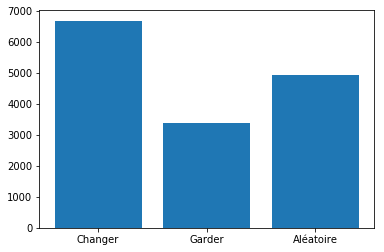

In [27]:
plot = plt.bar([1,2,3],[sum(play(Strategie.CHANGER, 10000)), 
               sum(play(Strategie.GARDER, 10000)), sum(play(Strategie.ALEATOIRE, 10000))], 
        tick_label=["Changer","Garder", "Aléatoire"])

## Comportement linéaire en fonction du nombre de tours

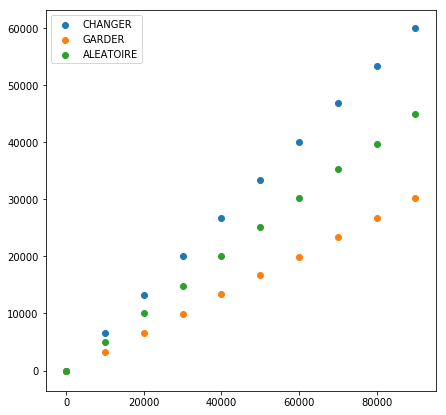

In [28]:
gains_changer, gains_garder, gains_aleatoire = [], [], []
samples =  [10000*i for i in range(10)]
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER, tours))
    gains_garder.append(play(Strategie.GARDER, tours))
    gains_aleatoire.append(play(Strategie.ALEATOIRE, tours))

G_C = [sum(x) for x in gains_changer]
G_G = [sum(x) for x in gains_garder]
G_A = [sum(x) for x in gains_aleatoire]

figure = plt.figure(figsize = (7,7))
plot = plt.scatter(samples, G_C, label = 'CHANGER')
plot = plt.scatter(samples, G_G, label = 'GARDER')
plot = plt.scatter(samples, G_A, label = 'ALEATOIRE')
legend = plt.legend(loc = 'upper left')

## Moyenne des gains

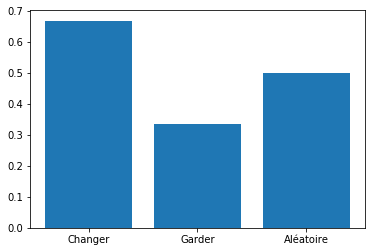

In [29]:
plt.bar([1,2,3], [sum(G_C)/sum(samples), sum(G_G)/sum(samples), sum(G_A)/sum(samples)], tick_label = ["Changer", "Garder", "Aléatoire"]);

# Conclusion :

### La probabilité de gagner en changeant de porte est de 2/3.
### La probabilité de gagner en gardant la même porte des de 1/3.
### La probabilité de gagner en changeant aléatoirement de porte est de 1/2.

### Cela est conforme à l'intuition :
    . Si on choisit de changer de porte : Initialement il y a deux chemins possibles (sur les trois existants) qui mènent à la victoire puisqu'il y a deux portes sur trois qui ne contiennent pas de voiture. Probabilité 2/3.
    . Si on choisit de garder la même porte : Initialement il n'y a qu'un seul chemin possible (sur les trois existants) qui mène à la victoire. Probabilité 1/3.
    . Si on change aléatoirement de porte : On ne se préoccupe pas de ce qu'il s'est passé avant, et on se retrouve dans une situation où l'on a une chance sur deux de gagner. Probabilité 1/2.